## Chaotic Patterns & Fractals
Following notebook portrays different chaotic and fractal (self-similar) patterns. The intent is to be explorative  , self-contained with code examples, and hopefully somewhat artistic - depicting order in chaos.

In [100]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
%matplotlib inline
np.random.seed(123)

#UTILITIES

#plot function
def scatterPlotWithParams(x_data, y_data, in_title='Beatiful plot', in_marker=',', x_lab = 'x',y_lab = 'y', color='black'):
    figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter( 
            x=x_data,       #x-value
            y=y_data,        #z-value
            c = color,    #color
            alpha = 0.8, #opacity
            marker = in_marker,
            s=1,
            )
    plt.xlabel(x_lab) # Add x label
    plt.ylabel(y_lab) # Add y label
    plt.title(in_title) # Add title
    plt.show()

### Sierpinski triangle
Can be generated by the below simple "chaos game":
    1. Take three points in a plane to form a triangle, you need not draw it.
    2. Randomly select any point inside the triangle and consider that your current position.
    3. Randomly select any one of the three vertex points.
    4. Move half the distance from your current position to the selected vertex.
    5. Plot the current position.
    6. Repeat from step 3.
    
more: https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle

In [321]:
#Start triangle in 2D X-Y plane

#start - assume equilateral
x_dim = 1000.00
y_dim = 1000.00
A = {"x": x_dim/3, "y" : y_dim/3}
B = {"x": x_dim/2, "y" : 2*y_dim/3}
C = {"x": 2*x_dim/3, "y" : y_dim/3}
trianglePoints = [A,B,C]

points = trianglePoints

#generate point between fromPoint and toPoint given a distance
def getNewPoint(fromPoint,toPoint,distance):
    return {  'x' : fromPoint['x'] + distance*(toPoint['x']-fromPoint['x'])
            , 'y' : fromPoint['y'] + distance*(toPoint['y']-fromPoint['y']) }

#generate random point inside triangle starting from first
def randomPointInTriangle(trianglePoints):
    V0 = trianglePoints[0] #A
    V1 = trianglePoints[1] #B
    V2 = trianglePoints[2] #C
    c1 = np.random.uniform(0,1) 
    c2 = np.random.uniform(0,1)
    interMediatePoint = getNewPoint(V0,V1,c1)
    endPoint = getNewPoint(interMediatePoint,V2,c2)
    return endPoint


#generate all points
n_points = 10000
distanceToNext=0.5
startPoint = randomPointInTriangle(trianglePoints)
points.append(randomPointInTriangle(trianglePoints))
previousPoint = startPoint
for n in range(0,n_points):
    randomPoint = np.random.choice([A,B,C])
    newPoint = getNewPoint(previousPoint,randomPoint,distanceToNext)
    points.append(newPoint)
    previousPoint = newPoint

data = pd.DataFrame.from_dict(points)

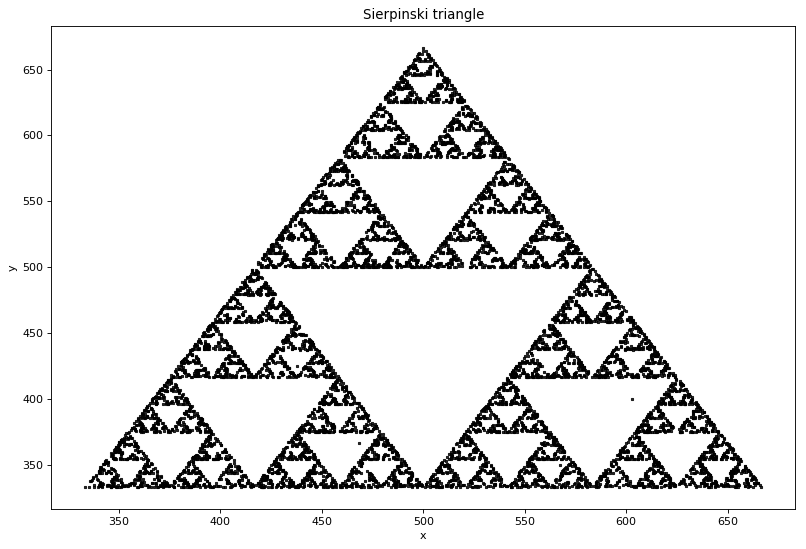

In [322]:
#plot
scatterPlotWithParams(data['x'],data['y'],'Sierpinski triangle')


## Barnsley fern

The Barnsley fern is generated through four affine transformations on the below form for any point (x,y):

$$ f(x,y) = \begin{bmatrix}
a & b\\
c & d
\end{bmatrix}\begin{bmatrix}
x\\
y
\end{bmatrix} + \begin{bmatrix}
e\\
f
\end{bmatrix}$$

Which of the four transformations should be chosen is random with P(0) = 1%, P(1) = 85%, P(2) = 7% and P(3) = 7%. 

In [209]:
#Transformations
#f0
f0 = np.array([ [0.0, 0.0], [0.0, 0.16]])
c0 = np.array([ [0.0, 0.0] ])

#f1
f1 = np.array([ [0.85, 0.04], [-0.04, 0.85]])
c1 = np.array([ [0.0, 1.6] ])

#f2
f2 = np.array([ [0.2, -0.26], [0.23, 0.22]])
c2 = np.array([ [0.0, 1.6] ])

#f3
f3 = np.array([ [-0.15, 0.28], [0.26, 0.24]])
c3 = np.array([ [0.0, 0.44] ])


In [262]:
#generation

#starting point
points = np.array([ [0.0, 0.0] ])
n_points = 50000

for n in range(1,n_points):
    v_prev = points[n-1]
    v_next = v_prev
    randInt = np.random.randint(0,100)
    if randInt < 1:
        v_next = f0 @ v_prev + c0
    elif randInt < 86:
        v_next = f1 @ v_prev + c1
    elif randInt < 93:
        v_next = f2 @ v_prev + c2
    else:
        v_next = f3 @ v_prev + c3   
    points = np.vstack((points,v_next))


data = pd.DataFrame.from_records(points, columns=['x','y'])


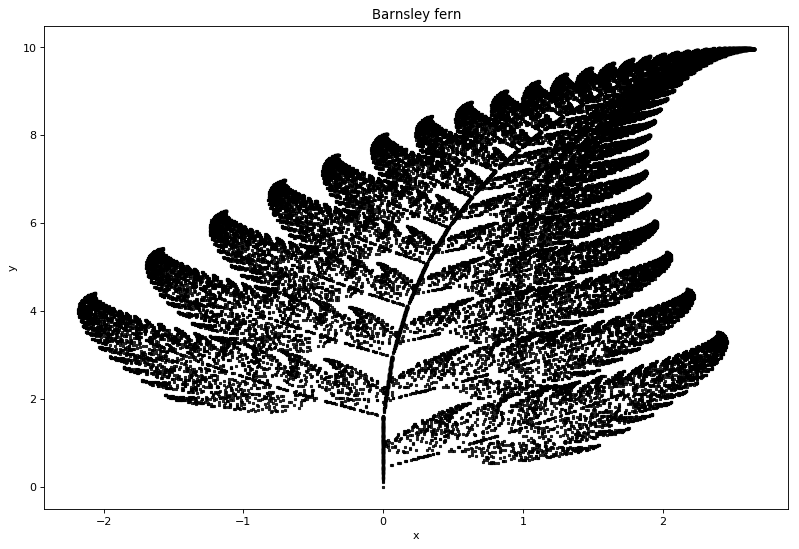

In [264]:
#plot
scatterPlotWithParams(data['x'],data['y'],'Barnsley fern')

## Lorenz Attractor

A Lorenz system is a 3-dimensional system of athmospheric pressure over time, which exemplifies the implications of initial conditions. Lorenz used the below differential equations to define it:

$$\dfrac{dx}{dt} = \sigma (y - z) $$

$$\dfrac{dy}{dt} = x(\rho - z) -y $$

$$\dfrac{dz}{dt} = xy - \beta z $$


more: https://en.wikipedia.org/wiki/Lorenz_system

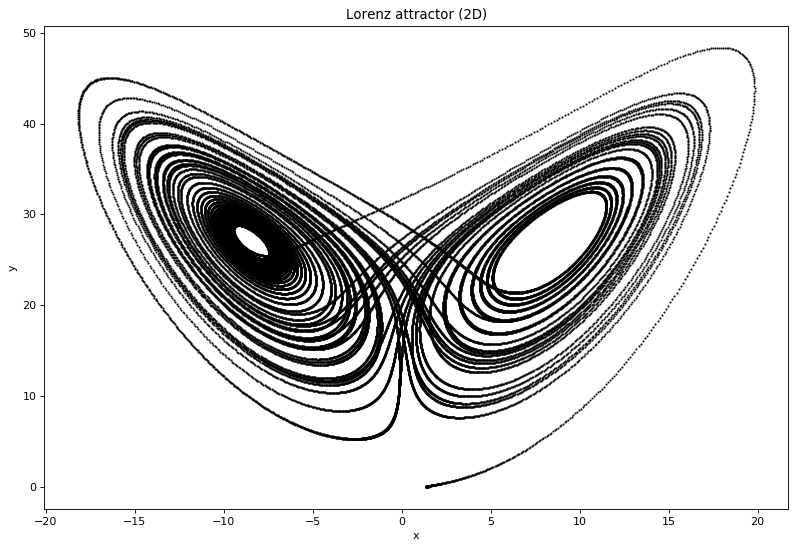

In [260]:
#ODE solution
from scipy.integrate import odeint

#Lorenz function to integrate
def f(state, t, rho, sigma, beta):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

#solution parameters (original used by Lorenz)
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

#state
initialState = [1.5, 0.5, 0.0]
time = np.arange(0.0, 50.0, 0.001)

#states over time
states = odeint(f, initialState, time, args=(rho,sigma,beta))

#plot    
scatterPlotWithParams(states[:, 0], states[:, 2], 'Lorenz attractor (2D)', 'o')

## Chaos games

In [361]:
#Start triangle in 2D X-Y plane

#start - assume equilateral
x_dim = 1000.00
y_dim = 1000.00
A = {"x": x_dim/5, "y" : 2*y_dim/3}
B = {"x": x_dim/2, "y" : y_dim}
C = {"x": 4*x_dim/5, "y" : 2*y_dim/3}
D = {"x": 2*x_dim/3, "y" : 0}
E = {"x": x_dim/3, "y" : 0}
shapePoints = [A,B,C,D,E]

points = shapePoints

#generate point between fromPoint and toPoint given a distance
def getNewPoint(fromPoint,toPoint,distance):
    return {  'x' : fromPoint['x'] + distance*(toPoint['x']-fromPoint['x'])
            , 'y' : fromPoint['y'] + distance*(toPoint['y']-fromPoint['y']) }

#generate random point inside triangle starting from first
def randomPointInShape(shapePoints):
    V0 = shapePoints[0] #A
    V1 = shapePoints[1] #B
    V2 = shapePoints[2] #C
    V3 = shapePoints[3] #D
    V4 = shapePoints[4] #E
    c1 = np.random.uniform(0,1) 
    c2 = np.random.uniform(0,1)
    c3 = np.random.uniform(0,1)
    c4 = np.random.uniform(0,1)
    interMediatePoint = getNewPoint(V0,V1,c1)
    interMediatePoint = getNewPoint(interMediatePoint,V2,c2)
    interMediatePoint = getNewPoint(interMediatePoint,V3,c3)
    endPoint = getNewPoint(interMediatePoint,V4,c4)
    return endPoint


#generate all points
n_points = 50000
distanceToNext=3/5
startPoint = randomPointInShape(shapePoints)
points.append(randomPointInShape(shapePoints))
previousPoint = startPoint
for n in range(0,n_points):
    randomPoint = np.random.choice([A,B,C,D,E])
    newPoint = getNewPoint(previousPoint,randomPoint,distanceToNext)
    points.append(newPoint)
    previousPoint = newPoint

data = pd.DataFrame.from_dict(points)

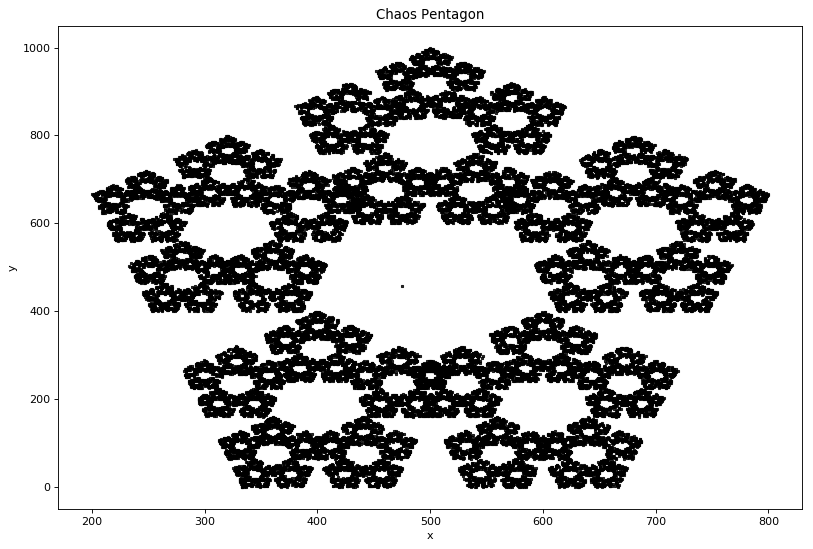

In [362]:
#plot
scatterPlotWithParams(data['x'],data['y'],'Chaos Pentagon')